# Numerical tests

We presented a simple numerical test. First, some details about the problem and the numerical method are provided.

## Partial differential equation
We will focus on the problem
$$
\Delta u  = 0 \quad \text{in }\Omega
$$
with Dirichlet boundary conditions
$$
u = 0 \quad \text{on }\Gamma_{top}, \quad u = 1 \quad \text{on }\Gamma_{bot}
$$
and periodic boundary conditions
$$
u(0,y)=u(1,y),\;\partial_{x} u(0,y)=\partial_{x}u(1,y) \quad 0\leq y\leq 1
$$
The domain $\Omega$ is defined by
$$
\Omega = \left\{(x,y)\mid 0 \leq x \leq 1,\;0 \leq y \leq \eta(x) \right\}
$$
where $\eta$ is a function such that $\eta(0)=\eta(1)=1$ and $\eta^\prime(0)=\eta^\prime(1)$.
The general problem can be reduced to this problem after a change of variable.

## Parametrization of the top boundary

The top boundary is parametrized with a curve of the form:
$$
\eta\left(x,t\right)=a_{-1}\left(t\right)\phi_{-1}\left(x\right)+\sum_{i=0}^{N-1}a_{i}\left(t\right)\phi_{i}\left(x\right)+a_{N}\left(t\right)\phi_{N}\left(x\right)
$$
$\phi_i$ are basis functions.
Thus, the domains is
$$
\Omega_{t}=\left\{ \left(x,y\right)\mid0\leq x\leq1,\,0\leq y\leq\eta\left(x,t\right)\right\} 
$$

Applying the boundary conditions
$$
\eta\left(0,t\right)=\eta\left(1,t\right),\quad\partial_{x}\eta\left(0,t\right)=\partial_{x}\eta\left(1,t\right)
$$
we obtain that
$$
\eta\left(x,t\right)=\sum_{i=0}^{N-1}\left(\alpha_{i}\phi_{-1}\left(x\right)+\phi_{i}\left(x\right)+\beta_{i}\phi_{N}\left(x\right)\right)a_{i}\left(t\right)
$$

with $\alpha$ and $\beta$ given by
$$
\alpha=\frac{1}{d}\left(\left(\phi_{N}\left(1\right)-\phi_{N}\left(0\right)\right)B-\left(\phi_{N}^{\prime}\left(1\right)-\phi_{N}^{\prime}\left(0\right)\right)A\right)
$$
$$
\beta =\frac{1}{d}\left(\left(\phi_{-1}^{\prime}\left(1\right)-\phi_{-1}^{\prime}\left(0\right)\right)A-\left(\phi_{-1}\left(1\right)-\phi_{-1}\left(0\right)\right)B\right)
$$

where
$$
d =\det\left(\begin{array}{cc}
\phi_{-1}\left(1\right)-\phi_{-1}\left(0\right) & \phi_{N}\left(1\right)-\phi_{N}\left(0\right)\\
\phi_{-1}^{\prime}\left(1\right)-\phi_{-1}^{\prime}\left(0\right) & \phi_{N}^{\prime}\left(1\right)-\phi_{N}^{\prime}\left(0\right)
\end{array}\right)
$$
$$
A =\left(\phi_{i}\left(1\right)-\phi_{i}\left(0\right)\right)_{i=0}^{N-1}
$$
$$
B = \left(\phi_{i}^{\prime}\left(1\right)-\phi_{i}^{\prime}\left(0\right)\right)_{i=0}^{N-1}
$$

## Parametrization of the domain

Writting $a_{i}\left(t\right)=\lambda_{i}+t\delta\lambda_{i}$, the domain $\Omega_t$ is parametrized by the vector of parameters $\lambda$ and a perturbation $\delta\lambda$:
$$
\Omega_t = \Omega(\lambda + t\delta\lambda ) 
$$
Denote $\Omega = \Omega_0 = \Omega(\lambda) $.

## Optimization problem

Here we solve the minimization problem
$$
\min_{\lambda} \int_{\Omega\left(\lambda\right)}\left|\nabla u_{\Omega\left(\lambda\right)}\right|^{2}
$$
subject to
$$
\int_{\Omega\left(\lambda\right)}1=c, \quad \int_{\Omega\left(\lambda\right)}y = d
$$
with $u_{\Omega\left(\lambda\right)}$ solution to the Dirichlet problem presented at the beginning.

## Numerical method

To solve the optimization problem, we applied a gradient descent-ascent to the Lagrangian funcional
$$
\begin{align*}
\mathcal{L}\left(\lambda,\zeta,\ell,\xi\right) & =
\int_{\Omega\left(\lambda\right)}\left|\nabla u_{\Omega\left(\lambda\right)}\right|^{2}+
\left\langle \ell,\left(\int_{\Omega\left(\lambda\right)}1-c,\int_{\Omega\left(\lambda\right)}y-d\right)-\zeta\right\rangle \\
 & +\left\langle \xi,\zeta\right\rangle +\frac{p}{2}\left\langle \zeta,\zeta\right\rangle -\frac{q}{2}\left\langle \ell-\xi,\ell-\xi\right\rangle 
\end{align*}
$$
to obtain its saddle point. Here $p$ and $q$ are weight parameters.

We deduce that the gradient of $\mathcal{L}$ with respect to $\lambda$ is
$$
\nabla_{\lambda}\mathcal{L}\left(\lambda,\zeta,\ell,\xi\right)=\left(\mu_{-1}\alpha_{i}+\mu_{i}+\mu_{N}\beta_{i}\right)_{i=0}^{N-1}
$$
where
$$
\mu_{i}=\int_{\Gamma_{top}}\left(\left(\partial_{\nu}u_{\Omega}\right)^{2}+\left\langle \ell,\left(1,y\right)\right\rangle \right)\,\phi_{i}\left(x\right)\nu_{y}\left(x,\eta\left(x,0\right)\right)ds
$$

## Preliminary test

We calculate the energy
$$
\int_{\Omega}\left|\nabla u_{\Omega}\right|^{2}
$$
for domains $\Omega$ defined by
$$
\Omega = \left\{(x,y)\mid 0 \leq x \leq 1,\;0 \leq y \leq \eta(x) \right\}
$$
with
$$\eta(x)=1 + l\sin((x-z)2k\pi),$$
where $l$ is a reduccion factor, $k$ is a integer, and $z$ translates the curve.

Energy for $z = 0$. We have seen that the same values are obtained for other values of $z$.

|       | $l$=0.1  | $l$=0.2  | $l$=0.3  | $l$=0.4  | $l$=0.5  | $l$=0.6  |
|-------|--------|--------|--------|--------|--------|--------|
| $k$=1   | 1.0296 | 1.106  | 1.2169 | 1.3645 | 1.5606 | 1.8295 |
| $k$=2   | 1.0503 | 1.1541 | 1.2929 | 1.4752 | 1.7214 | 2.0692 |
| $k$=3   | 1.0631 | 1.1778 | 1.3279 | 1.5253 | 1.7941 | 2.1799 |
| $k$=4   | 1.0715 | 1.1918 | 1.3481 | 1.5539 | 1.8357 | 2.2438 |

Therefore, more oscillations of the sin function increase the energy.

## Simple numerical test

We now solve the optimization problem. 600 iterations were performed. Piecewise linear funcitions were used to parametrize the top boundary, with 19 interior nodes. The algorithm converged.
We used the following constraints:
$$
\int_{\Omega}1 dx= 1, \quad  \int_{\Omega}y dx= 0.55
$$

The following figure shows the convergence of the method. The value of the lagrangian $\mathcal{L}$, the energy, the constraints and other quantities are shown in it.

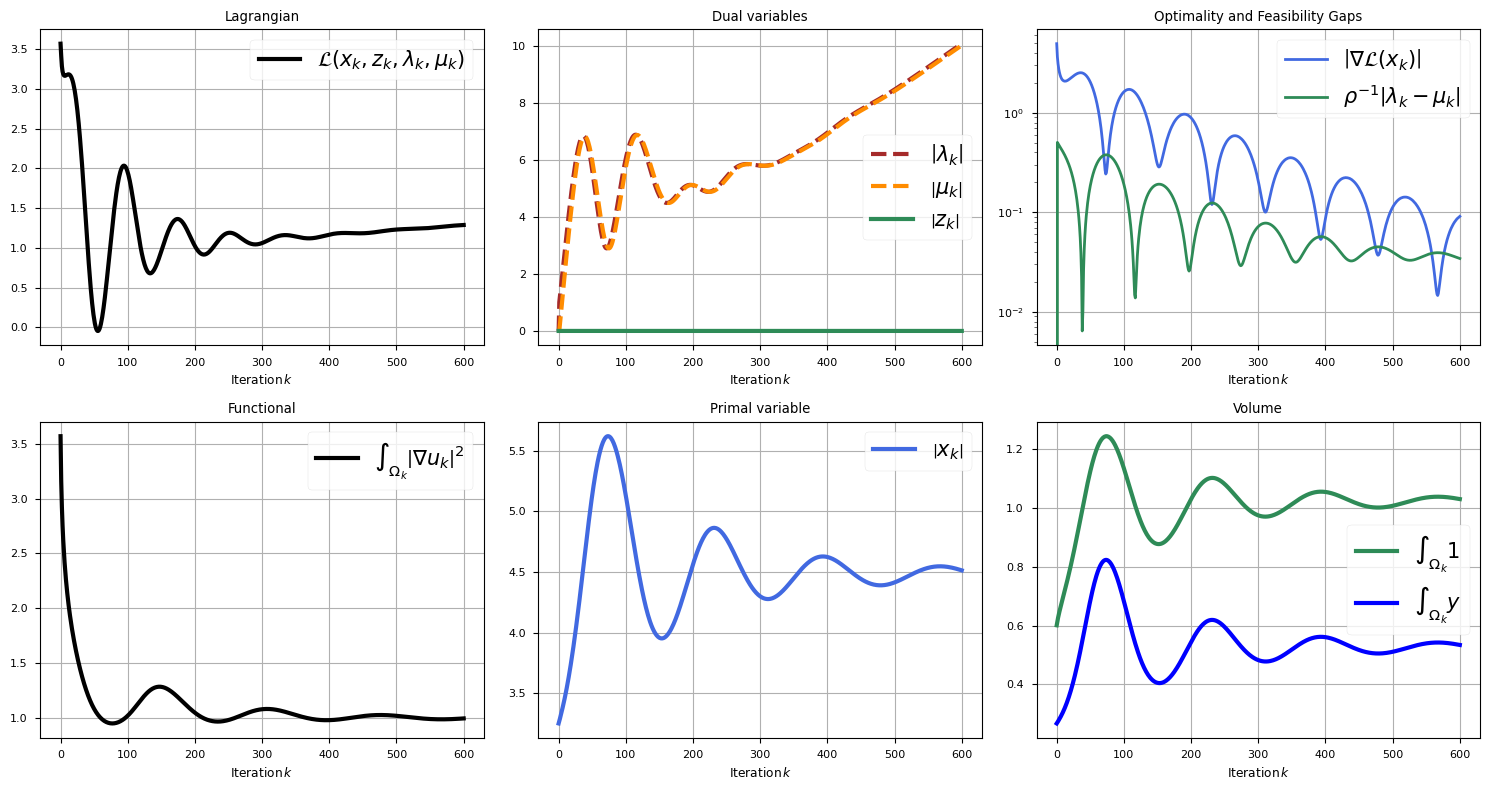

In [2]:
import codewater as cw
cw.Plot()

Comments:

* The convergence is very sensitive to the initial guess.
* Due to problems with the underlying PDE solver, we are limited to approximately 650 iterations.
* We have implemented other basis functions to parametrize the curve. Addressing the above issues will help to achieve good results with these basis functions.

Below, the domains obtained at some iterations.

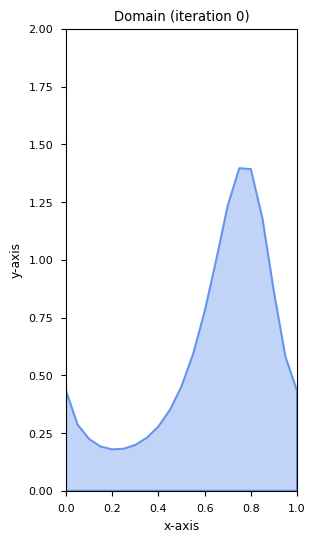

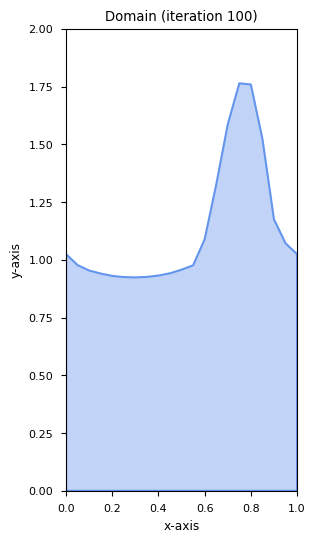

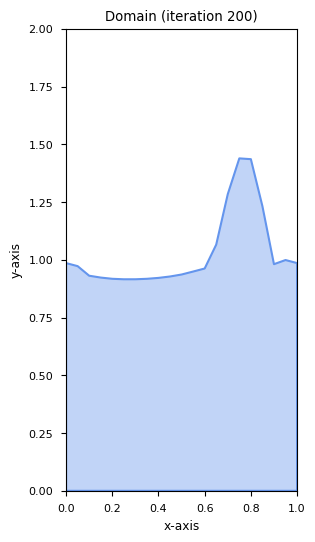

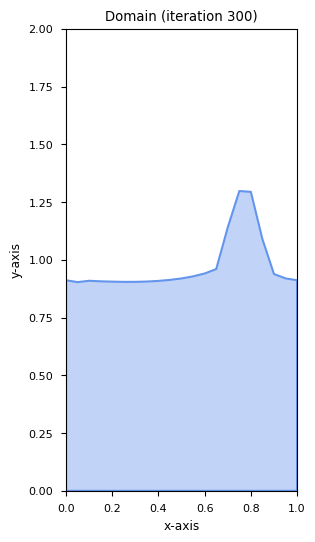

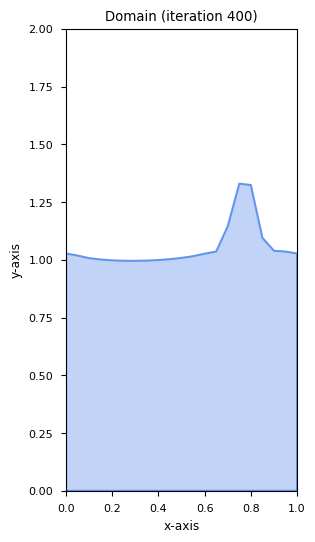

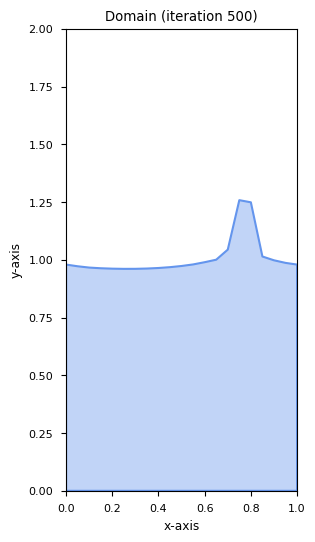

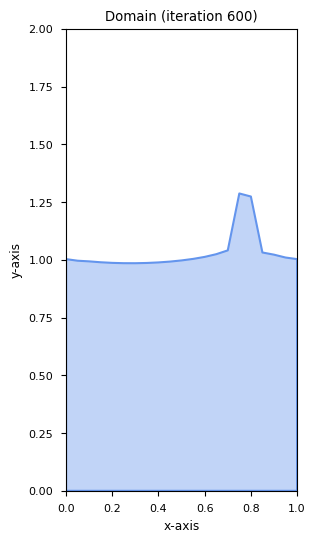

In [1]:
import codewater as cw
cw.test09()